<a href="https://colab.research.google.com/github/Tavo826/Aprende-ML-Book-/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clasifica si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux

Características:

* Duración de la visita en segundos
* Cantidad de páginas vistas durante la sesión
* Cantidad de acciones del usuario (click, scroll, uso de checkbox, sliders, etc)
* Suma del valor de las acciones

Salida discreta:

0: Windows\
1: Macintosh\
2: Linux



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Libro_AprendeML/usuarios_win_mac_lin.csv')
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [ ]:
#Información estadística
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [ ]:
#Resultados de cada tipo de clase
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ba9ad4710>,
      dtype=object)

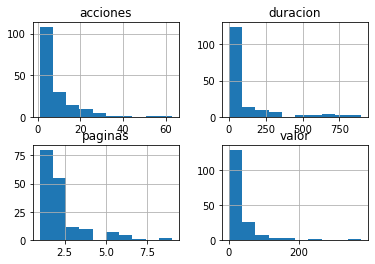

In [ ]:
#Visualización de datos
dataframe.drop(['clase'], 1).hist()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


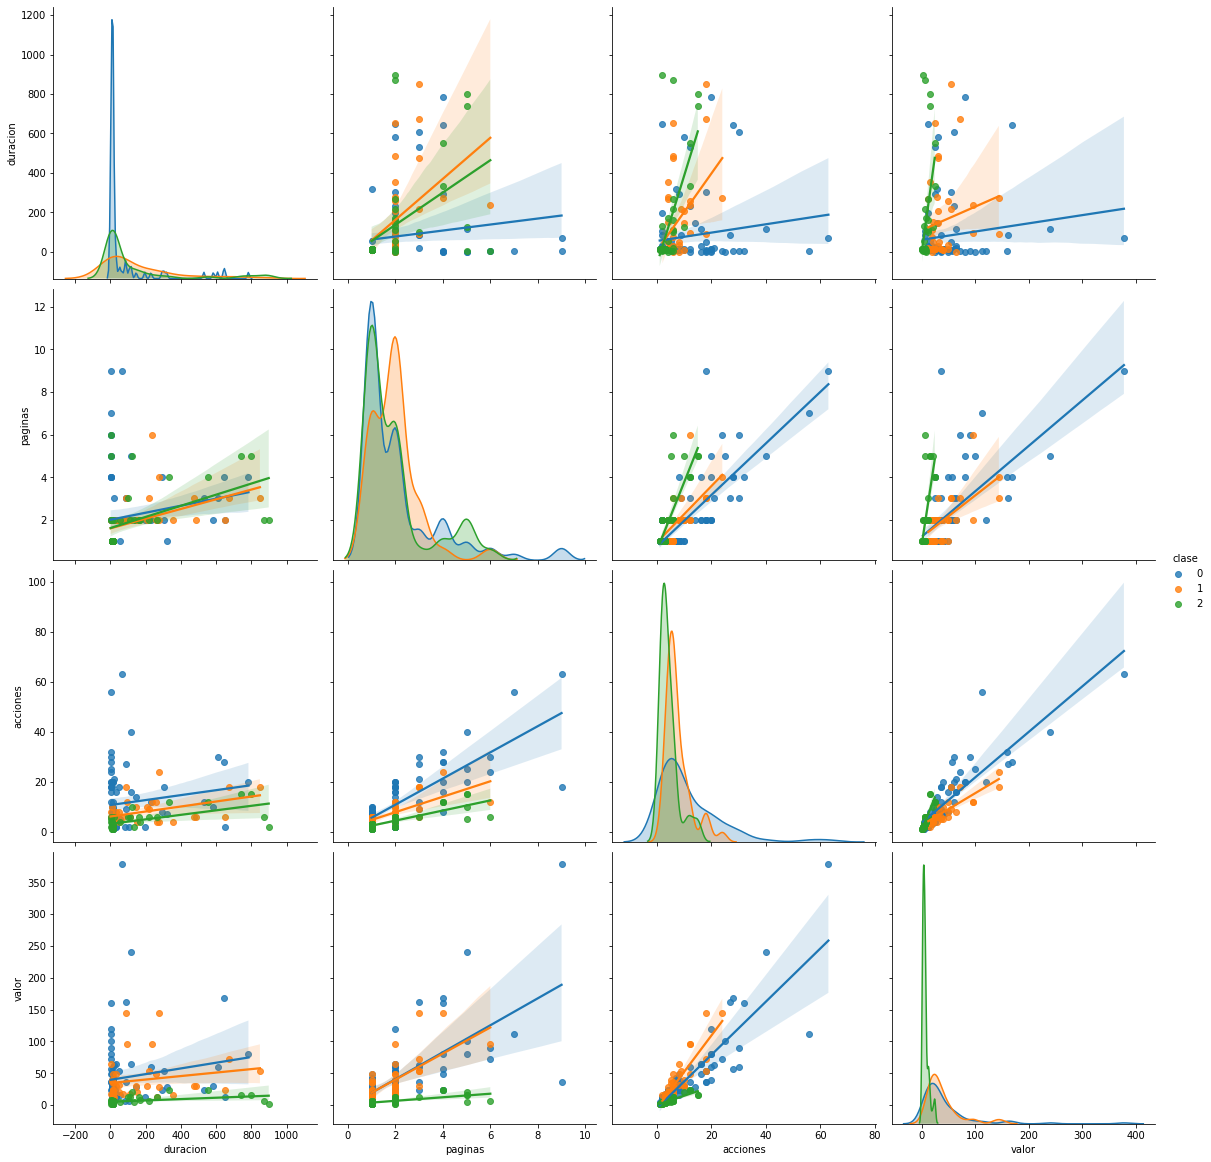

In [ ]:
#Interrelación de entradas, concentración lineal de las salidas

sb.pairplot(dataframe.dropna(), hue='clase', size=4, vars=['duracion', 'paginas', 'acciones', 'valor'], kind='reg')

In [ ]:
#Se crea el modelo

X = np.array(dataframe.drop(['clase'], 1))
y = np.array(dataframe['clase'])
print(X.shape)

model = linear_model.LogisticRegression()
model.fit(X, y)

(170, 4)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Se clasifica el modelo
predictions = model.predict(X)
print(predictions[0:5])

#Presición media de las predicciones
model.score(X, y)

[2 2 2 2 2]


0.7823529411764706

In [ ]:
#Validación del modelo
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, 
                                                                                test_size = validation_size,
                                                                                random_state=seed)

In [ ]:
name = 'Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model,
                                             X_train, Y_train,
                                             cv=kfold, scoring='accuracy')
msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
print(msg)

In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


In [ ]:
#Matriz de confusión
print(confusion_matrix(Y_validation, predictions))
print('\n')
#Reporte de clasificación
print(classification_report(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



In [ ]:
#Probando con datos nuevos

X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2])